In [41]:
# Main
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Audio Staff
import librosa
import librosa.display
from IPython.display import Audio


In [4]:
!pip install soundata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.0/162.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 17.9 MB/s eta 0:00:00
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64900 sha256=f1f3ef84763beda39d2b79df488f661478bae793ceefe98eb94fcf068edc3c62
  Stored in directory: /root/.cache/pip/wheels/3e/b9/4f/64010f7e4412ba5c6190fe04ce93487970f

In [5]:
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there


5.61GB [12:11, 8.24MB/s]                                
1.15MB [00:01, 727kB/s]                             
100%|██████████| 8732/8732 [00:21<00:00, 415.14it/s]


({'metadata': {}, 'clips': {}}, {'metadata': {}, 'clips': {}})

In [6]:
example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip.fold)  # see the available data
print(example_clip)  # see the available data

4
Clip(
  audio_path="/root/sound_datasets/urbansound8k/audio/fold4/195969-0-0-18.wav",
  clip_id="195969-0-0-18",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesound_start_tim

In [7]:
main_data = list(dataset.load_clips().values())

In [8]:
for i, x in enumerate(main_data):
    if i > 10:
        break
    print(x.fold, x.class_label, x.class_id, x.audio_path)

1 children_playing 2 /root/sound_datasets/urbansound8k/audio/fold1/135776-2-0-49.wav
1 gun_shot 6 /root/sound_datasets/urbansound8k/audio/fold1/46654-6-0-0.wav
1 air_conditioner 0 /root/sound_datasets/urbansound8k/audio/fold1/57320-0-0-24.wav
1 air_conditioner 0 /root/sound_datasets/urbansound8k/audio/fold1/134717-0-0-26.wav
1 jackhammer 7 /root/sound_datasets/urbansound8k/audio/fold1/174276-7-5-0.wav
1 jackhammer 7 /root/sound_datasets/urbansound8k/audio/fold1/180937-7-2-6.wav
1 drilling 4 /root/sound_datasets/urbansound8k/audio/fold1/17913-4-0-1.wav
1 jackhammer 7 /root/sound_datasets/urbansound8k/audio/fold1/103074-7-4-6.wav
1 engine_idling 5 /root/sound_datasets/urbansound8k/audio/fold1/176787-5-0-9.wav
1 drilling 4 /root/sound_datasets/urbansound8k/audio/fold1/55020-4-0-11.wav
1 dog_bark 3 /root/sound_datasets/urbansound8k/audio/fold1/138015-3-0-7.wav


In [12]:
tmp_df = []

for clip in main_data:
    if clip.fold == 10 or clip.fold == 9:
        continue
    if clip.class_label == 'air_conditioner':
        tmp_df.append(("air_conditioner", clip.audio_path))
    elif clip.class_label == 'car_horn':
        tmp_df.append(("car_horn", clip.audio_path))
    elif clip.class_label == 'children_playing':
        tmp_df.append(("children_playing", clip.audio_path))
    elif clip.class_label == 'dog_bark':
        tmp_df.append(("dog_bark", clip.audio_path))
    elif clip.class_label == 'drilling':
        tmp_df.append(("drilling", clip.audio_path))
    elif clip.class_label == 'engine_idling':
        tmp_df.append(("engine_idling", clip.audio_path))
    elif clip.class_label == 'gun_shot':
        tmp_df.append(("gun_shot", clip.audio_path))
    elif clip.class_label == 'jackhammer':
        tmp_df.append(("jackhammer", clip.audio_path))
    elif clip.class_label == 'siren':
        tmp_df.append(("siren", clip.audio_path))
    elif clip.class_label == 'street_music':
        tmp_df.append(("street_music", clip.audio_path))

df = pd.DataFrame.from_dict(tmp_df)
df.rename(columns={1 : "Path", 0 : "Class"}, inplace=True)

df.head()

,Class,Path
0,children_playing,/root/sound_datasets/urbansound8k/audio/fold1/...
1,gun_shot,/root/sound_datasets/urbansound8k/audio/fold1/...
2,air_conditioner,/root/sound_datasets/urbansound8k/audio/fold1/...
3,air_conditioner,/root/sound_datasets/urbansound8k/audio/fold1/...
4,jackhammer,/root/sound_datasets/urbansound8k/audio/fold1/...


In [15]:
%matplotlib inline

plt.style.use("ggplot")     

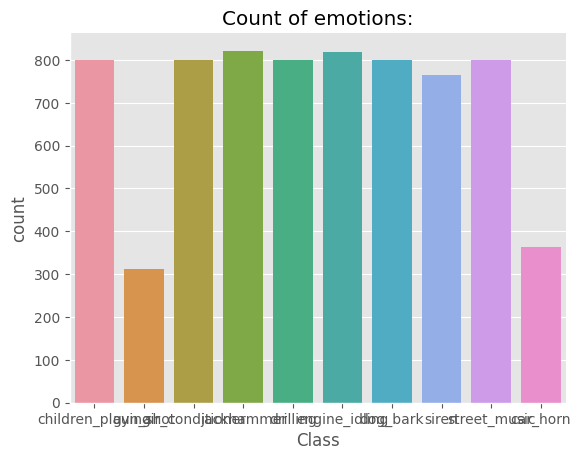

In [21]:
plt.title("Count of emotions:")
sns.countplot(x=df["Class"])
sns.despine(top=True, right=True, left=False, bottom=False)

## Listen to and Plot each Class

In [39]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

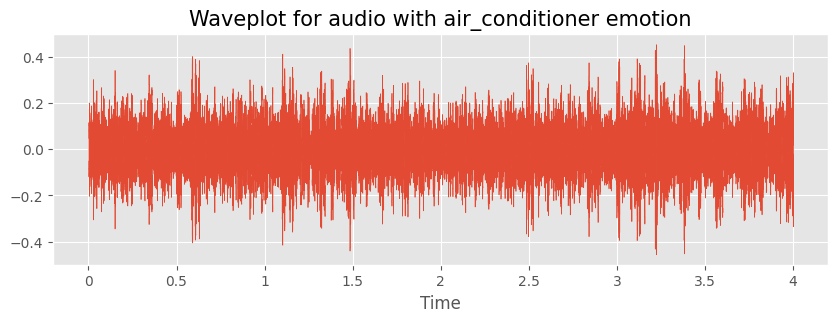

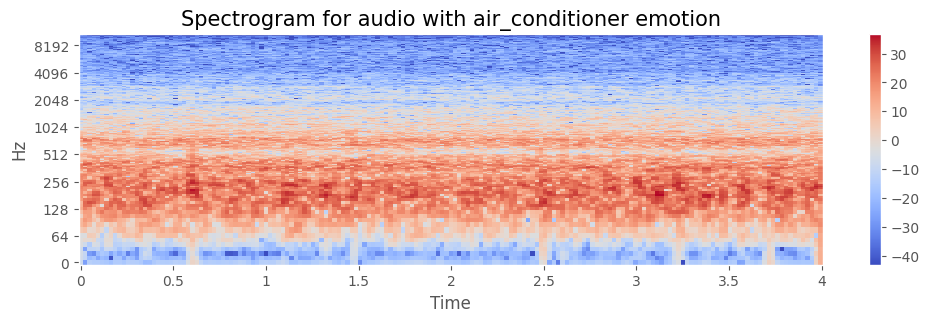

In [42]:
emotion='air_conditioner'
path = np.array(df.Path[df.Class==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Data augmentation

We have some ways for data augmentation in sound data:

1. Noise injection
2. Stretching
3. Shifting
4. Pitching

In [37]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    """Add some noise to sound sample. Use random if you want to add random noise with some threshold.
    Or use rate Random=False and rate for always adding fixed noise."""
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    """Stretching data with some rate."""
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data, rate=1000):
    """Shifting data with some rate"""
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7, random=False):
    """"Add some pitch to sound sample. Use random if you want to add random pitch with some threshold.
    Or use pitch_factor Random=False and rate for always adding fixed pitch."""
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

### Feature extraction

#### There are some features may be useful:

1. Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.
2. Energy : The sum of squares of the signal values, normalized by the respective frame length.
3. Entropy of Energy :The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
3. Spectral Centroid : The center of gravity of the spectrum.
4. Spectral Spread : The second central moment of the spectrum.
5. Spectral Entropy : Entropy of the normalized spectral energies for a set of sub-frames.
6. Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
7. Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
8. MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.

In [22]:
n_fft = 2048
hop_length = 512

In [29]:
def chunks(data, frame_length, hop_length):
    for i in range(0, len(data), hop_length):
        yield data[i:i+frame_length]

# Zero Crossing Rate
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)


def energy(data, frame_length=2048, hop_length=512):
    en = np.array([np.sum(np.power(np.abs(data[hop:hop+frame_length]), 2)) for hop in range(0, data.shape[0], hop_length)])
    return en / frame_length


def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)


def entropy_of_energy(data, frame_length=2048, hop_length=512):
    energies = energy(data, frame_length, hop_length)
    energies /= np.sum(energies)

    entropy = 0.0
    entropy -= energies * np.log2(energies)
    return entropy


def spc(data, sr, frame_length=2048, hop_length=512):
    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spectral_centroid)


# def spc_entropy(data, sr):
#     spc_en = spectral_entropy(data, sf=sr, method="fft")
#     return spc_en

def spc_flux(data):
    isSpectrum = data.ndim == 1
    if isSpectrum:
        data = np.expand_dims(data, axis=1)

    X = np.c_[data[:, 0], data]
    af_Delta_X = np.diff(X, 1, axis=1)
    vsf = np.sqrt((np.power(af_Delta_X, 2).sum(axis=0))) / X.shape[0]

    return np.squeeze(vsf) if isSpectrum else vsf


def spc_rollof(data, sr, frame_length=2048, hop_length=512):
    spcrollof = librosa.feature.spectral_rolloff(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(spcrollof)


def chroma_stft(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    stft = np.abs(librosa.stft(data))
    chroma_stft = librosa.feature.chroma_stft(S=stft, sr=sr)
    return np.squeeze(chroma_stft.T) if not flatten else np.ravel(chroma_stft.T)


def mel_spc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

In [60]:
path = np.array(df["Path"])[658]
data, sampling_rate = librosa.load(path)
len(data)

88200

In [61]:
print("ZCR: ", zcr(data).shape)
print("Energy: ", energy(data).shape)
print("Entropy of Energy :", entropy_of_energy(data).shape)
print("RMS :", rmse(data).shape)
print("Spectral Centroid :", spc(data, sampling_rate).shape)
# print("Spectral Entropy: ", spc_entropy(data, sampling_rate).shape)
print("Spectral Flux: ", spc_flux(data).shape)
print("Spectral Rollof: ", spc_rollof(data, sampling_rate).shape)
print("Chroma STFT: ", chroma_stft(data, sampling_rate).shape)
print("MelSpectrogram: ", mel_spc(data, sampling_rate).shape)
print("MFCC: ", mfcc(data, sampling_rate).shape)
print("Melspectrogram: ",np.mean(librosa.feature.melspectrogram(y=data, sr=sampling_rate).T, axis=0).shape)


ZCR:  (173,)
Energy:  (173,)
Entropy of Energy : (173,)
RMS : (173,)
Spectral Centroid : (173,)
Spectral Flux:  ()
Spectral Rollof:  (173,)
Chroma STFT:  (2076,)
MelSpectrogram:  (22144,)
MFCC:  (3460,)
Melspectrogram:  (128,)


In [64]:
def extract_features(data, sr, frame_length=2048, hop_length=512):
    result = np.array([])
    # print(len(data))
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        np.mean(energy(data, frame_length, hop_length),axis=0),
                        # np.mean(entropy_of_energy(data, frame_length, hop_length), axis=0),
                        # rmse(data, frame_length, hop_length),
                        # spc(data, sr, frame_length, hop_length),
                        # spc_entropy(data, sr),
                        # spc_flux(data),
                        # spc_rollof(data, sr, frame_length, hop_length),
                        # chroma_stft(data, sr, frame_length, hop_length),
                        # mel_spc(data, sr, frame_length, hop_length, flatten=True),
                        # mfcc(data, sr, frame_length, hop_length)
                                    ))
    return result

In [65]:
# def get_features(path, duration=2.5, offset=0.6):
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    # data, sample_rate = librosa.load(path, duration=duration, offset=offset)
    data, sample_rate = librosa.load(path)

     # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    # data with noise
    noise_data = noise(data, random=True)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) # stacking vertically

    # data with pitching
    pitched_data = pitch(data, sample_rate, random=True)
    res3 = extract_features(pitched_data, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    # data with pitching and white_noise
    new_data = pitch(data, sample_rate, random=True)
    data_noise_pitch = noise(new_data, random=True)
    res3 = extract_features(data_noise_pitch, sample_rate)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [66]:
X, Y = [], []
print("Feature processing...")
for path, emotion, ind in zip(df.Path, df.Class, range(df.Path.shape[0])):
    features = get_features(path)
    # print(features.shape)
    if ind % 100 == 0:
        print(f"{ind} samples has been processed...")

    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    # print(len(X[0]))
    # print(X)
    # print(len(Y))
    # break
print("Done.")

Feature processing...
0 samples has been processed...
100 samples has been processed...
200 samples has been processed...
300 samples has been processed...
400 samples has been processed...


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(


500 samples has been processed...


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


600 samples has been processed...
700 samples has been processed...


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


800 samples has been processed...
900 samples has been processed...
1000 samples has been processed...
1100 samples has been processed...
1200 samples has been processed...
1300 samples has been processed...
1400 samples has been processed...
1500 samples has been processed...
1600 samples has been processed...
1700 samples has been processed...
1800 samples has been processed...
1900 samples has been processed...
2000 samples has been processed...
2100 samples has been processed...
2200 samples has been processed...
2300 samples has been processed...
2400 samples has been processed...
2500 samples has been processed...
2600 samples has been processed...
2700 samples has been processed...
2800 samples has been processed...
2900 samples has been processed...
3000 samples has been processed...
3100 samples has been processed...
3200 samples has been processed...
3300 samples has been processed...
3400 samples has been processed...
3500 samples has been processed...
3600 samples has been 

In [67]:
features_path = "./features_first.csv"

In [68]:
extracted_df = pd.DataFrame(X)
extracted_df["labels"] = Y
extracted_df.shape

(28316, 176)

In [69]:
extracted_df.to_csv(features_path, index=False)
extracted_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,labels
0,0.138672,0.199219,0.259766,0.252930,0.242676,0.250488,0.253906,0.245117,0.246582,0.222656,...,0.119629,0.116211,0.118164,0.118652,0.105957,0.088867,0.057129,0.000086,NaN,children_playing
1,0.138672,0.199219,0.259766,0.253906,0.243652,0.252441,0.256836,0.247070,0.249512,0.225586,...,0.121582,0.119141,0.120117,0.120605,0.106934,0.088867,0.057129,0.000086,NaN,children_playing
2,0.136230,0.195312,0.246582,0.244141,0.243652,0.238770,0.231445,0.229492,0.219727,0.217285,...,0.117676,0.115234,0.109375,0.106445,0.097656,0.080566,0.057129,0.000046,NaN,children_playing
3,0.142090,0.202148,0.257324,0.253418,0.249023,0.246582,0.245117,0.243164,0.241211,0.240234,...,0.258789,0.234863,0.202148,0.183105,0.187988,0.171875,0.131836,0.000044,NaN,children_playing
4,0.078613,0.151367,0.211914,0.235840,0.255371,0.248047,0.247559,0.250488,0.250977,0.250488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gun_shot


# Resources

1. https://urbansounddataset.weebly.com/urbansound8k.html